In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import gc

import string
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [2]:
df = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

Let's explore the dataset

In [3]:
df.shape

(31499, 3)

In [4]:
df.head()

,question,answer_text,distractor
0,Meals can be served,in rooms at 9:00 p. m.,"'outside the room at 3:00 p. m.', 'in the dini..."
1,It can be inferred from the passage that,The local government can deal with the problem...,"'If some tragedies occur again ', ' relevant d..."
2,The author called Tommy 's parents in order to,help them realize their influence on Tommy,"'blame Tommy for his failing grades', 'blame T..."
3,It can be inferred from the passage that,the writer is not very willing to use idioms,'idioms are the most important part in a langu...
4,How can we deal with snake wounds according to...,Stay calm and do n't move .,'Cut the wound and suck the poison out .'


In [5]:
df['question'][1]

'It can be inferred from the passage that'

In [6]:
df['answer_text'][1]

'The local government can deal with the problem of lacking money by some means .'

In [7]:
df['distractor'][1]

"'If some tragedies occur again ', ' relevant departments of the State Council should take responsibility completely .', 'Currently ', ' the central government has established sound management systems to guarantee school bus safety .', 'Central and local governments will share the costs on building more modern schools in rural areas .'"

In [8]:
df.isnull().sum()

question       0
answer_text    0
distractor     0
dtype: int64

<b>Let's generate the word cloud for the text

In [9]:
#Wordcloud Representation

from wordcloud import STOPWORDS,WordCloud

def wcloud(text,title=None,figure_size=(24.0,16.0)):
    stopwords = set(STOPWORDS)
#     stopwords = stopwords.union({'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'})
    
    wordcloud = WordCloud(stdf[answer_text].split()opwords=stopwords,random_state = 42,width=800, 
                    height=400,).generate(str(text))
    
    plt.figure(figsize=figure_size)
    plt.title(title,fontdict={'size': 40,})
    plt.imshow(wordcloud)

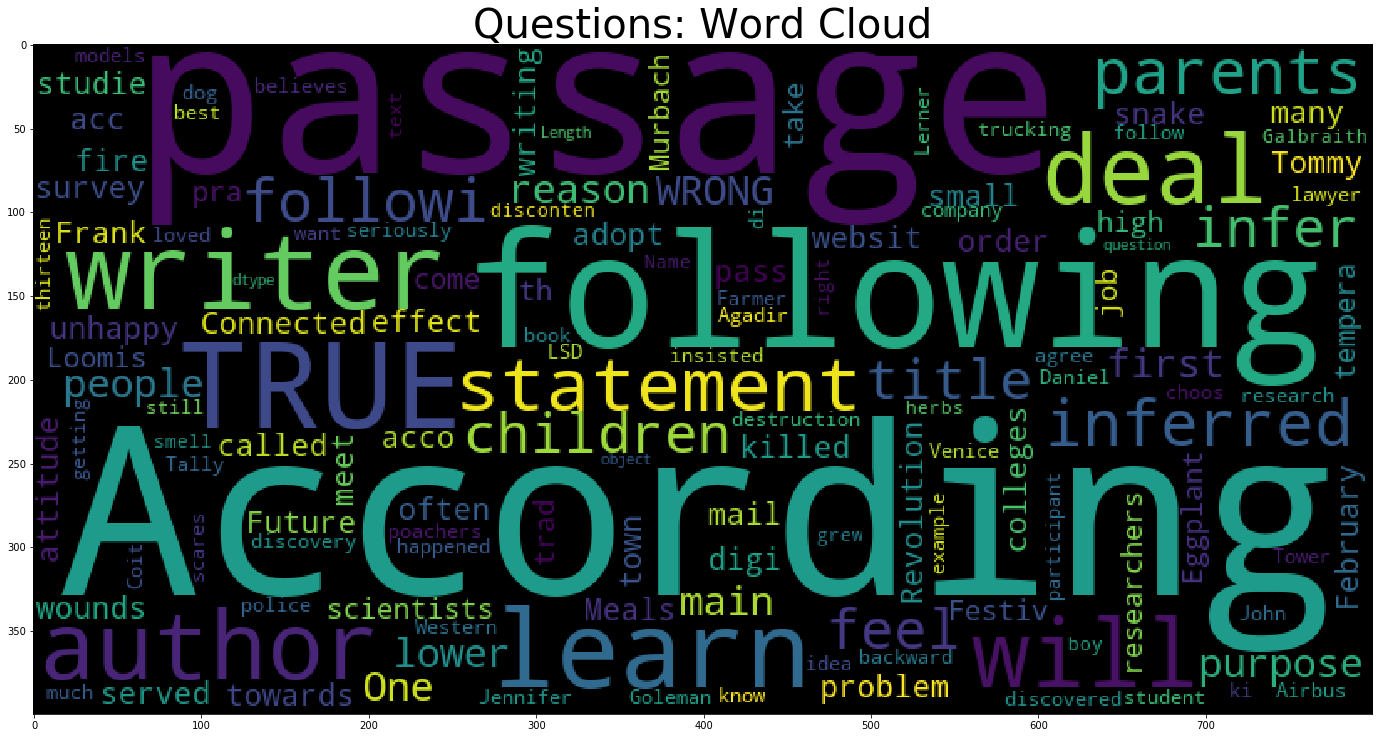

In [10]:
wcloud(df['question'],'Questions: Word Cloud')

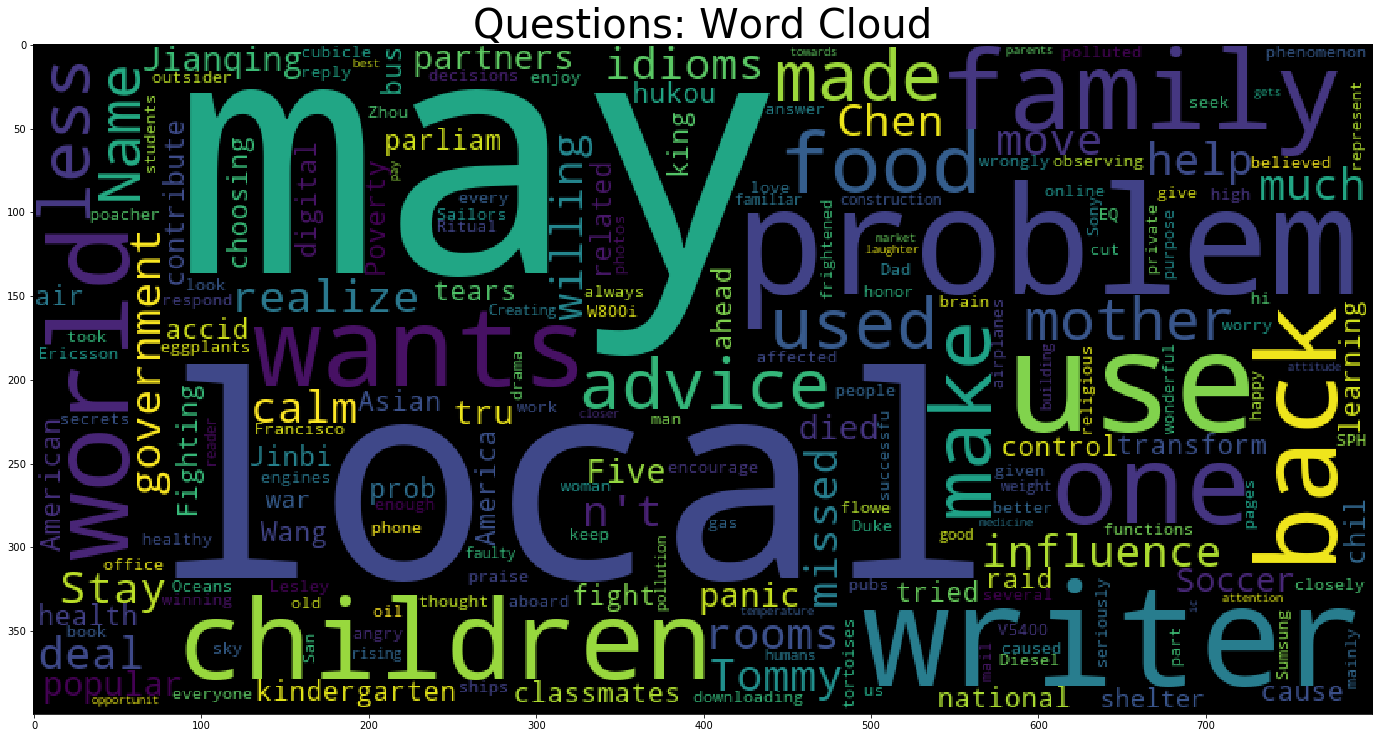

In [11]:
wcloud(df['answer_text'],'Questions: Word Cloud')

<b> From the word cloud we can see that there are certain words that are higly repetative

### A variety of words are present in all of the classes, let compare the ngrams for each of them

In [12]:
from collections import defaultdict

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

def generate_bar(df,color):
    plot = go.Bar(x=df['word_count'].values[::-1],y=df['word'].values[::-1],
                 orientation = 'h',showlegend=False,marker=dict(color=color))
    return plot

In [13]:
#Bar for questions
freq_dict = defaultdict(int)
for rev in df['question']:
    for word in generate_ngrams(rev,2):
        freq_dict[word]+=1
sorted_freq = pd.DataFrame(sorted(freq_dict.items(),key= lambda x:x[1])[::-1])
sorted_freq.columns = ['word', 'word_count']
plot1 = generate_bar(sorted_freq.head(20),'green')

In [14]:
#Bar for answers
freq_dict = defaultdict(int)
for rev in df['answer_text']:
    for word in generate_ngrams(rev,2):
        freq_dict[word]+=1
sorted_freq = pd.DataFrame(sorted(freq_dict.items(),key= lambda x:x[1])[::-1])
sorted_freq.columns = ['word', 'word_count']
plot2 = generate_bar(sorted_freq.head(20),'blue')

In [15]:
# Creating two subplots
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words in Questions", 
                                          "Frequent words in Answers"])
fig.append_trace(plot1, 1, 1)
fig.append_trace(plot2, 1, 2)
fig['layout'].update(height=500, width=1200, paper_bgcolor='rgb(233,233,233)', title="Bi-gram Plots")
py.iplot(fig, filename='word-plots')

<b>From the Bigram plot we can see that due to presence of ab normal punctuations biagrams are not propely generated</b><br>

Let's fix them

In [16]:
# punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
punct = "/-?!.,#$%\()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
def fix_punt(sentence,punct):
    
    for p in punct:
#         sentence = sentence.replace(p, f' {p} ')
        sentence = sentence.replace(p, f'')
    return sentence

In [17]:
df['new_questions'] = df['question'].apply(lambda x: fix_punt(x,punct))
df['new_answers'] = df['answer_text'].apply(lambda x: fix_punt(x,punct))

In [18]:
#Bar for questions
freq_dict = defaultdict(int)
for rev in df['new_questions']:
    for word in generate_ngrams(rev,2):
        freq_dict[word]+=1
sorted_freq = pd.DataFrame(sorted(freq_dict.items(),key= lambda x:x[1])[::-1])
sorted_freq.columns = ['word', 'word_count']
plot1 = generate_bar(sorted_freq.head(20),'green')


#Bar for answers
freq_dict = defaultdict(int)
for rev in df['new_answers']:
    for word in generate_ngrams(rev,2):
        freq_dict[word]+=1
sorted_freq = pd.DataFrame(sorted(freq_dict.items(),key= lambda x:x[1])[::-1])
sorted_freq.columns = ['word', 'word_count']
plot2 = generate_bar(sorted_freq.head(20),'blue')

# Creating two subplots
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words in Questions", 
                                          "Frequent words in Answers"])
fig.append_trace(plot1, 1, 1)
fig.append_trace(plot2, 1, 2)
fig['layout'].update(height=500, width=1200, paper_bgcolor='rgb(233,233,233)', title="Bi-gram Plots")
py.iplot(fig, filename='word-plots')

<b>It's clear that text the "Distractor" columns may includes words that are neither present in "Question" nor in "answer_text". hence we can it can be safely concluded that solution to this problem requries a generative Deep Learning model rather than any ML based model.</b>

Let's proceed ahead with a creation of a Deep Learning model using pre-trained word embeddings

#### Loading <a href="http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip">GloVe</a> Word Embeddings

In [19]:
def load_embed(file):
    def get_coefs(word,*arr): 
        return word, np.asarray(arr, dtype='float32')
    
    embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(file, encoding='latin'))
    return embeddings_index

In [20]:
# embedding = load_embed('glove.840B.300d.txt')

In [21]:
# import pickle

# file = open('embed', 'wb')
# # dump information to that file
# pickle.dump(embedding, file)
# # close the file
# file.close()

In [22]:
import pickle

file = open('embed', 'rb')
# dump information to that file
embedding = pickle.load(file)
# close the file
file.close()

<b> We will combine the texts from "quesion" and "answer_text" to make more meaningful sentence and we will use this new colum for training the model<b>

In [23]:
df['new_questions'][0] + ' '+ df['new_answers'][0]

'Meals can be served in rooms at 900 p m'

In [24]:
df["new"] = df["new_questions"].map(str) + " " + df["new_answers"]

In [25]:
df= df.drop(labels=['new_questions','new_answers'], axis=1)

In [26]:
df.head()

,question,answer_text,distractor,new
0,Meals can be served,in rooms at 9:00 p. m.,"'outside the room at 3:00 p. m.', 'in the dini...",Meals can be served in rooms at 900 p m
1,It can be inferred from the passage that,The local government can deal with the problem...,"'If some tragedies occur again ', ' relevant d...",It can be inferred from the passage that The l...
2,The author called Tommy 's parents in order to,help them realize their influence on Tommy,"'blame Tommy for his failing grades', 'blame T...",The author called Tommy 's parents in order to...
3,It can be inferred from the passage that,the writer is not very willing to use idioms,'idioms are the most important part in a langu...,It can be inferred from the passage that the w...
4,How can we deal with snake wounds according to...,Stay calm and do n't move .,'Cut the wound and suck the poison out .',How can we deal with snake wounds according to...


<b> Now we should build our vocab keeping the frequency of each word in the vocab

In [27]:
from collections import defaultdict

def build_vocab(sentences):
    fd = defaultdict(int)
    for sentence in tqdm(sentences):
        for word in sentence:
            fd[word]+=1
    return fd

<b> Let's create a function to check how many words in our vocab are actually present in out embedding

In [28]:
def embed_intersection(vocab,embedding):
    temp = {}
    oov = {}
    i = 0
    j = 0
    
    for word in vocab.keys():
        try:
            temp[word] = embedding[word]
            i+=vocab[word]
        except:
            oov[word] = vocab[word]
            j+=vocab[word]
            pass
    
    print(f"Found embeddings for {(len(temp)/len(vocab)*100):.3f}% of vocab")
    print(f"Found embeddings for {(i/(i+j))*100:.3f}% of all text")
    
    sorted_x = sorted(oov.items(), key = lambda x: x[1])[::-1]
    return sorted_x

In [29]:
tqdm.pandas()
sentences = df['new'].progress_apply(lambda x: x.split()).values
vocab = build_vocab(sentences)
oov = embed_intersection(vocab,embedding)

100%|██████████| 31499/31499 [00:00<00:00, 443297.45it/s]

Found embeddings for 94.635% of vocab
Found embeddings for 99.733% of all text


In [30]:
oov[:10]

[('color1s', 10),
 ('TRUEaccording', 7),
 ('NOTtrue', 7),
 ('ks5u', 6),
 ('Para2', 5),
 ('Para3', 5),
 ('TitanicII', 4),
 ('GreenPlug', 4),
 ('Lettrs', 3),
 ('post90s', 3)]

After preprocessing the text we have embeddings for 99.733% of the texts.
We can see that now most of the out of vocab words are due to use of some slang or due to some spelling mistake.<br>

Now the embeddings covers almost all of our text data, let move ahead and start building model

In [31]:
def avg_len(data):
    len_str = data['new'].apply(lambda x : len(x.split()))
    return np.mean(len_str)

In [32]:
avg_len(df)

16.724784913806786

In [33]:
def max_len(data):
    len_str = data['new'].apply(lambda x : len(x.split()))
    return np.max(len_str)
max_len(df)

130

In [34]:
vocab_size = len(vocab) + 1
max_len = 21

In [35]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [36]:
def process_data(data):
    
    t = tf.keras.preprocessing.text.Tokenizer(filters='')
    t.fit_on_texts(data)
    data = t.texts_to_sequences(data)
    data = tf.keras.preprocessing.sequence.pad_sequences(data,maxlen = max_len)
    return data, t.word_index,t

In [37]:
data, word_index, tokenizer = process_data(df['new'])

X, y = data[:,:-1], data[:,-1]
# y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)

In [38]:
X.shape

(31499, 20)

<b> Let's divide our dataset into train and validation set

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=17)

#### Let's make our embedding matrix

In [41]:
def make_embed_mat(embedding,word_index,vocab_size):
    embds = np.stack(embedding.values())
    emb_mean,emb_std = embds.mean(), embds.std()
    embed_size = embds.shape[1]
    word_index = word_index
    embedding_matrix = np.random.normal(emb_mean,emb_std,(vocab_size,embed_size))
    
    for word,i in word_index.items():
        if i>=vocab_size:
            continue
        embedding_vec = embedding.get(word)
        if embedding_vec is not None:
            embedding_matrix[i] = embedding_vec
    return embedding_matrix

In [42]:
embed_matrix = make_embed_mat(embedding,word_index,vocab_size)
del word_index, vocab, sentences, embedding
gc.collect()

/home/aadil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



20

In [43]:
embed_matrix.shape

(23003, 300)

<b> Building a LSTM based deep learning model for generating the distractors

In [44]:
def make_model(embedding_matrix, embed_size=300, loss='sparse_categorical_crossentropy'):
    
    inp = tf.keras.layers.Input(shape=(max_len-1,))
    x = tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=embed_size,weights=[embedding_matrix],trainable=False)(inp)
    x = tf.keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu')(x)
    x = tf.keras.layers.MaxPooling1D(pool_size=2)(x)
    x = tf.keras.layers.Flatten()(x)
#     x = tf.keras.layers.CuDNNGRU(128,return_sequences=True)(x)
#     x = tf.keras.layers.CuDNNGRU(128)(x)
#     avg_pl = tf.keras.layers.GlobalAveragePooling1D()(x)
#     max_pl = tf.keras.layers.GlobalMaxPooling1D()(x)
#     concat = tf.keras.layers.concatenate([avg_pl,max_pl])
    dense  = tf.keras.layers.Dense(64, activation="relu")(x)
#     dense  = tf.keras.layers.Dropout(rate = 0.7)(dense)
    output = tf.keras.layers.Dense(vocab_size, activation="softmax")(dense)
    
    model = tf.keras.models.Model(inputs=inp, outputs=output)
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    return model

In [45]:
model = make_model(embed_matrix)

In [46]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 20, 300)           6900900   
_________________________________________________________________
conv1d (Conv1D)              (None, 19, 32)            19232     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 9, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                18496     
_________________________________________________________________
dense_1 (Dense)              (None, 23003)             149519

In [47]:
checkpoints = tf.keras.callbacks.ModelCheckpoint('model.h5',monitor='val_acc',mode='max',save_best_only='True',verbose=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=2, verbose=1, min_lr=0.000001)

In [48]:
epochs = 15
batch_size = 128

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=[X_val, y_val], callbacks=[checkpoints, reduce_lr])

Train on 28349 samples, validate on 3150 samples
Epoch 1/15
28288/28349 [============================>.] - ETA: 0s - loss: 8.4654 - acc: 0.0107
Epoch 00001: val_acc improved from -inf to 0.01492, saving model to model.h5
28349/28349 [==============================] - 8s 294us/sample - loss: 8.4638 - acc: 0.0107 - val_loss: 8.1237 - val_acc: 0.0149
Epoch 2/15
27776/28349 [============================>.] - ETA: 0s - loss: 7.7437 - acc: 0.0122
Epoch 00002: val_acc improved from 0.01492 to 0.01651, saving model to model.h5
28349/28349 [==============================] - 8s 272us/sample - loss: 7.7421 - acc: 0.0123 - val_loss: 8.2203 - val_acc: 0.0165
Epoch 3/15
28288/28349 [============================>.] - ETA: 0s - loss: 7.4950 - acc: 0.0145
Epoch 00003: val_acc did not improve from 0.01651
28349/28349 [==============================] - 3s 98us/sample - loss: 7.4948 - acc: 0.0146 - val_loss: 8.2724 - val_acc: 0.0162
Epoch 4/15
27776/28349 [============================>.] - ETA: 0s - loss:

In [49]:
seed = df['question'][0]# + ' life' + ' life'
print(seed)

Meals can be served


In [50]:
encoded = tokenizer.texts_to_sequences([seed])

In [51]:
encoded

[[1186, 9, 17, 2160]]

In [52]:
encoded = tf.keras.preprocessing.sequence.pad_sequences(encoded,maxlen = max_len-1)

In [53]:
encoded

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 1186,    9,   17, 2160]],
      dtype=int32)

In [54]:
# predict probabilities for each word
yhat = model.predict(encoded, verbose=0)

In [55]:
yhat[0][:10]

array([5.1335352e-13, 7.0881907e-13, 1.5017234e-07, 2.3078178e-08,
       5.7266607e-05, 5.0432303e-09, 2.4838747e-07, 8.7814808e-12,
       1.5813607e-12, 3.1419575e-11], dtype=float32)

In [56]:
np.argmax(yhat,axis=1)

array([1233])

In [57]:
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
    result = list()
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])
        # truncate sequences to a fixed length
        encoded = tf.keras.preprocessing.sequence.pad_sequences(encoded,maxlen = seq_length-1)
        # predict probabilities for each word
        yhat = model.predict(encoded, verbose=0)
        yhat = np.argmax(yhat,axis=1)[0]
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
        result.append(out_word)
    return ' '.join(result)

In [58]:
generate_seq(model, tokenizer, seq_length = 21, seed_text = seed, n_words=10)

"sam 's spanish tailor home home school school school day"

__Tried multiple concepts and configurations of models but none of them seeems to be working well for generation of new text i.e. Distractors, as the text corpus is quite small for a model to properly learnning the context and to generating meaningful text.__

# Part: 2

### Check the next notebook named:'Baseline_2'

#### Build a vocab from the new text corpus that we prepared by combining 'questions', 'answers' and 'distractors'. and then create a model 